In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
style.use('fivethirtyeight')

experience = {'rect_horiz.csv':['Force : aucune (systeme isole)', 'Vitesse initiale : vers la droite'], 
              'rect_bas.csv':['Force : de pesanteur', 'Vitesse initiale : aucune (immobile)'],
             'rect_haut.csv':['Force : de pesanteur', 'Vitesse initiale : vers le haut'],
             'parab.csv':['Force : de pesanteur', 'Vitesse initiale : inclinée par rapport au sol']}

import csv
with open('rect_horiz.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for i in range(10):
        spamwriter.writerow([i,4])
    csvfile.close
    
with open('rect_bas.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for i in range(10):
        spamwriter.writerow([4,9-10*(i/10)**2])
    csvfile.close

with open('rect_haut.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for i in range(10):
        spamwriter.writerow([4,20*i/10-10*(i/10)**2])
    csvfile.close

with open('parab.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for i in range(10):
        spamwriter.writerow([i,2+10*i/10-10*(i/10)**2])
    csvfile.close

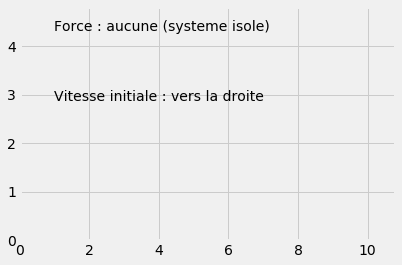

In [2]:
def vitesse(xs,ys,i):
    vx = (xs[i]-xs[i-1])/1
    vy = (ys[i]-ys[i-1])/1
    return vx,vy


def lecturecsv(fichier):
    graph_data = open(fichier,'r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    texte=experience[fichier]
    return fig, ax1,xs,ys, texte



def animate(i):
    xmax = max(xs)*1.2
    ymax = max(ys) *1.2
    ax1.clear()
    ax1.set_xlim(0,xmax)
    ax1.set_ylim(0,ymax)
    ax1.scatter(xs[:i], ys[:i])
    if i==0 : 
        ax1.annotate(texte[0],(1,ymax*0.9))
        ax1.annotate(texte[1],(1,ymax*0.6))
    if i>0 and i<len(xs): #if i>0 and i<len(xs)+1
        ax1.annotate(i,(xs[i-1],ys[i-1]))
        dx,dy = vitesse(xs,ys,i)
        ax1.arrow(xs[i-1],ys[i-1],dx,dy,head_width = 0.3, head_length=0.3, color = 'b',linewidth=1)

fig,ax1,xs,ys,texte = lecturecsv('rect_horiz.csv')
ani = animation.FuncAnimation(fig, animate,interval=500,save_count=len(xs))
from IPython.display import HTML
HTML(ani.to_jshtml())

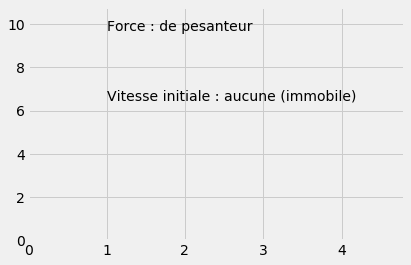

In [3]:
fig,ax1,xs,ys,texte = lecturecsv('rect_bas.csv')
ani = animation.FuncAnimation(fig, animate, interval=500,save_count=len(xs))
from IPython.display import HTML
HTML(ani.to_jshtml())

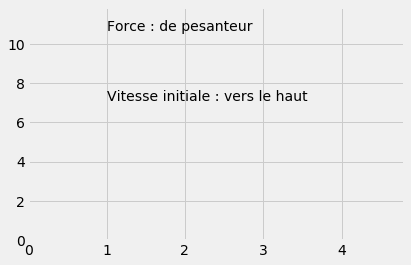

In [4]:
fig,ax1,xs,ys,texte = lecturecsv('rect_haut.csv')
ani = animation.FuncAnimation(fig, animate, interval=500,save_count=len(xs))
from IPython.display import HTML
HTML(ani.to_jshtml())

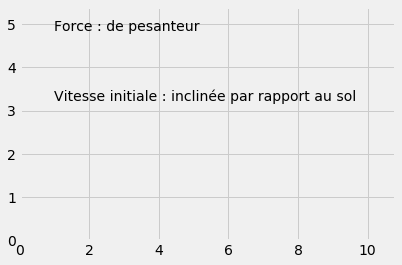

In [5]:
fig,ax1,xs,ys,texte = lecturecsv('parab.csv')
ani = animation.FuncAnimation(fig, animate, interval=500,save_count=len(xs))
from IPython.display import HTML
HTML(ani.to_jshtml())